# perceptron

**perceptron is**

- perceptron is used for binary linear classifier.
- 


**Given**
- dataset $\{(\boldsymbol{x}^{(1)}, t^{(1)}), ..., (\boldsymbol{x}^{(N)}, t^{(N)})\}$


  $\boldsymbol{x}^{(i)} \in \boldsymbol{R}^d$

  =

  $\boldsymbol{x}^{(i)} = \{x^{(1)}, x^{(2)}, ...., x^{(d)}\}$

  for all i, ( $1 \leq i \leq N)$
-  $t^{(i)} \in \{ 0, 1\}$


**data preprocess**

- scaling ( normalizing or standardizing) because perceptron is sensitive to scale of each features. 

**hyper parameter**


-  threshhold for the prediction ( $y^{(i)} = 0$ if $\boldsymbol{w}・\boldsymbol{x} + w_0 < c$ or $y^{(i)} = 1$ if $\boldsymbol{w}・\boldsymbol{x} + w_0 \geq c$)
-  optimization algorithm (GD/SGD/mini-batch SGC etc) 
- learning rate ( the bigger, the faster but more likely to diverge / the smaller, the more preicise and more likely to converge but slower)
- number of epochs 
- initial value of parameters (weights/bias)
- activation function ( usual perceptron uses step functon as activation function, but you might wanna try others like sigmoid, Relu..)
- whether shuffle the training data before each epochs. (shuffling is good for dealing with overfitting)
- stopping criteria (usually tolerance)
- early stopping or not.
- whether you apply regularization

**drawbacks**

- when the data set is not linearily separable, perceptron algorithm will never converge.
- result is not probabilstic. ( while logstic regression use sigmoid activation function to get probabilstic result)
- it is hard to generalize to the case when class is greater than 2 (you can generalize with one vs all or one vs one tho)

# training

optimization is done by the most basic method, gradient descent.

1. **initialize parameters**
2. **get activation**

   - $a = \boldsymbol{w}^{T}・\boldsymbol{x} + w_0$
3. **get prediction by plugging activation into activation function**

   - $f(a) = 1$ if $a \geq 0  $ or $=0$ if $a < 0 $
   -  $= \hat{y}$
4. **get weigh update from perceptron learning algorithm**

    - $\Delta{\boldsymbol{w}} = \eta \boldsymbol{X}^T(\hat{y}-y)$
    - $\Delta{w_0} = \eta (\hat{y} - y)$
5. **update**

  - $\boldsymbol{w}^{k+1} = \boldsymbol{w}^{k} + \Delta{\boldsymbol{w}}$
  - $w_{0}^{k+1} = w_{0}^{k} + \Delta{w_0}$

(if you put column vector whose element is only 1 and concate the vector to $\boldsymbol{X}$, then you do not have to separate $\boldsymbol{w}$ and $w_0$)

In [6]:
#!pip install nbimporter

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

np.random.seed(1111)




#import nbimporter
#from optimization_for_neural_net import optimization
#from activation_functions import activation

In [8]:
x, y = make_blobs(n_samples = 1000, centers = 2)

In [9]:
x[:5,:]

array([[-7.94207973,  8.69139902],
       [-7.27942308,  9.09874338],
       [-8.46266514,  8.80222152],
       [-3.67501082, -4.31807748],
       [-8.57699267,  9.55393509]])

In [10]:
y[:5]

array([0, 0, 0, 1, 0])

In [11]:
# the number of unique number and the number of centers are the same.
np.unique(y)

array([0, 1])

In [12]:
sum(y==0)/len(y)
# so target variable is not imbalanced >> accuracy can be used for metrics.

from sklearn.metrics import accuracy_score ,confusion_matrix

Text(0.5, 1.0, 'data set')

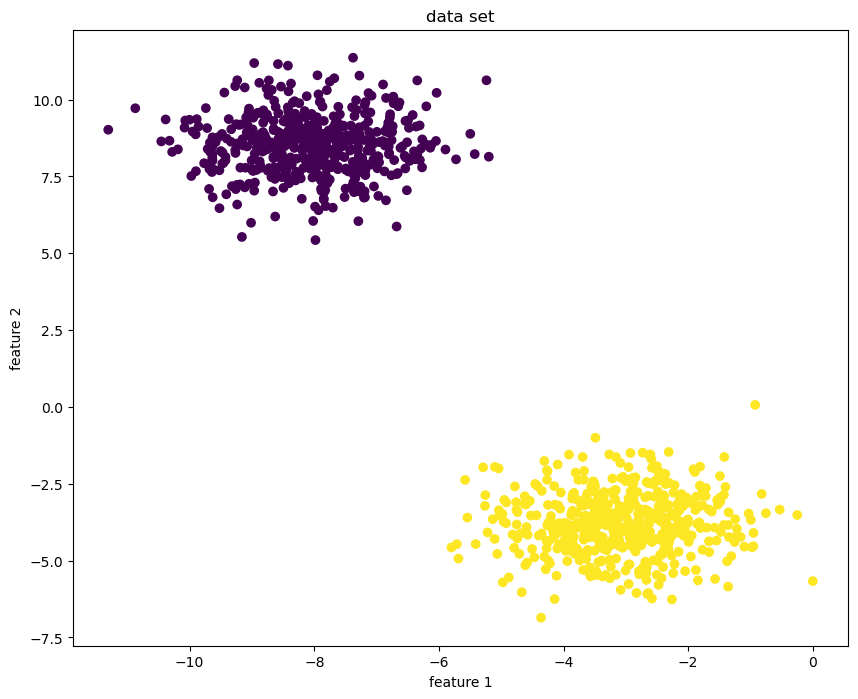

In [13]:
fig = plt.figure(figsize = (10,8))
plt.scatter(x[:,0],x[:,1],c = y)
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.title("data set")

In [14]:
x.shape

(1000, 2)

In [15]:
y.shape
# we want to make this column vector

(1000,)

In [16]:
y=y.reshape(-1,1)

In [17]:
# we want to split for test and train
# it is better to do cross validation but we just do basic this time so we do not implement cross validation this time

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.3)


In [18]:
class perceptron:
    
    def __init__(self,lr=0.001,mx_itr=10000,tol=1e-5,bias=False):
        self.lr = lr
        self.mx_itr = mx_itr
        self.tol = tol
        self.bias = True
        self.w = None

    def h_step(self,x):
        return np.array([1 if i >=0 else 0 for i in x])[:,np.newaxis]
    
    def train(self,x,y):
        if (self.bias):
            ones = np.ones(x.shape[0]).reshape(-1,1)
            x = np.concatenate([ones,x],axis=1)
        #print(f"shape of x is {x.shape}")
        #print(x[:5,:])
        self.w = np.random.normal(loc = 0, scale = 0.1, size = x.shape[1]).reshape(-1,1)
        for i in range(self.mx_itr):
            a = np.dot(x,self.w)
            y_pred = self.h_step(a)
            #print((y-y_pred).shape)
            dw = self.lr * np.dot(x.T, (y-y_pred))
            
            #print(dw.shape)
            #print(self.w.shape)
            
            self.w +=dw
            
        return self.w
    
    def get_w(self):
        if(self.w == None):
            print("train first")
        return self.w

    def predict(self,x):
        if (self.bias):
            ones = np.ones(x.shape[0]).reshape(-1,1)
            x = np.concatenate([ones,x],axis=1)
        return self.h_step(np.dot(x,self.w))

In [19]:
model = perceptron()

ws = model.train(x_train,y_train)


In [20]:
ws

array([[ 0.04047143],
       [ 0.34096855],
       [-1.07134478]])

In [21]:
y_pred  =model.predict(x_test)

In [22]:
confusion_matrix(y_test.reshape(-1),y_pred.reshape(-1))

array([[158,   0],
       [  2, 140]])

In [23]:
accuracy_score(y_test.reshape(-1),y_pred.reshape(-1))

0.9933333333333333

# plot hyper plane

$\boldsymbol{w_1}・x_1 + \boldsymbol{w_2}・x_2 + w_0 = 0$

$= x_2 = -\frac{\boldsymbol{w_1}}{\boldsymbol{w_2}}・x_1  - \frac{w_0}{\boldsymbol{w_1}}$



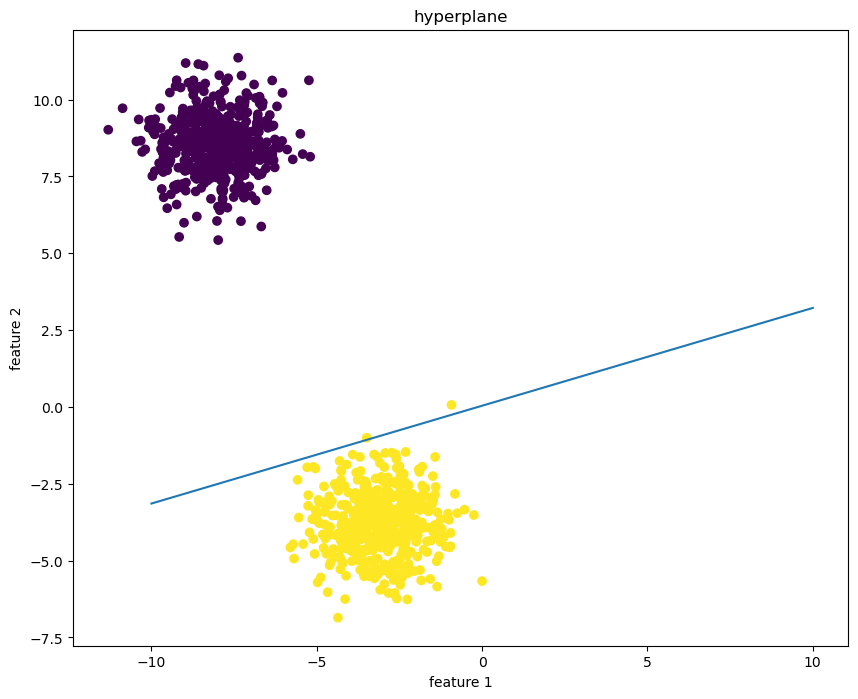

In [25]:
# plot hyper plane based on the weights you get.
def plot_hyperplane(X, y, ws):

    slope = - ws[1]/ws[2]
    intercept = - ws[0]/ws[2]
    x_hyperplane = np.linspace(-10,10,10)
    y_hyperplane = slope * x_hyperplane + intercept
    fig = plt.figure(figsize=(10,8))
    plt.scatter(X[:,0], X[:,1], c=y)
    plt.plot(x_hyperplane, y_hyperplane, '-')
    plt.title("hyperplane")
    plt.xlabel("feature 1")
    plt.ylabel("feature 2")
    plt.show()

plot_hyperplane(x,y,ws)

# perceptron using python library


In [27]:
from sklearn.linear_model import Perceptron

In [28]:
model2 = Perceptron(tol = 1e-5,random_state = 0)
model2.fit(x_train,y_train.reshape(-1))

Perceptron(tol=1e-05)

In [29]:
model2.score(x_test,y_test)

0.9966666666666667

In [30]:
coef = model2.coef_
incep = model2.intercept_

In [31]:
ws2 = np.concatenate((incep,coef.reshape(-1)))
ws2

array([  1.        ,   0.78599056, -11.69258857])

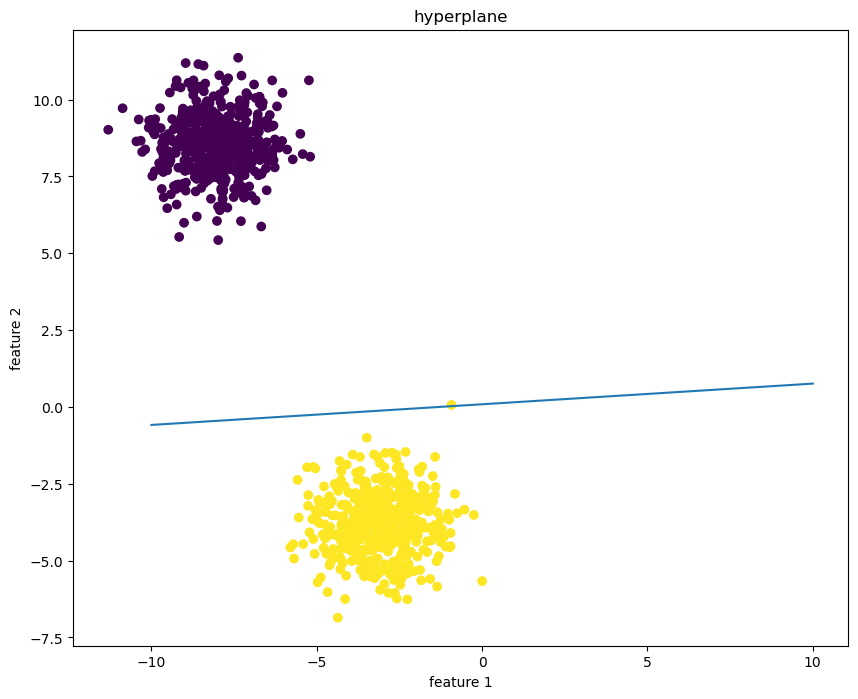

In [32]:
plot_hyperplane(x,y,ws2)

my perceptron uses max_iteration as the criteria of stopping but using tolerance as criteria might be better?